In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import *
import image
from matplotlib.animation import FuncAnimation 
import cv2
import glob

In [14]:
def pattern_plot(n,r,fact):
    #Theta
    thetas = []
    for i in range(0,n,1):
        thetas.append(i*pi/n)
    
    # A coordinates
    xa = [r*cos(theta) for theta in thetas]
    ya = [r*sin(theta) for theta in thetas]
    
    # B coordinates
    xb = [r*cos(fact*theta) for theta in thetas]
    yb = [r*sin(fact*theta) for theta in thetas]
    
    x = [xa,xb]
    y = [ya,yb]
    
    return x,y

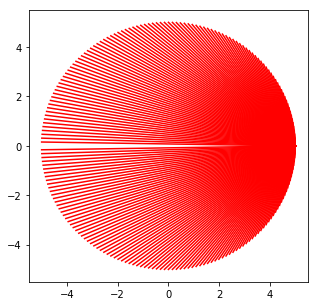

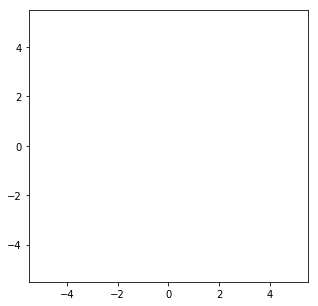

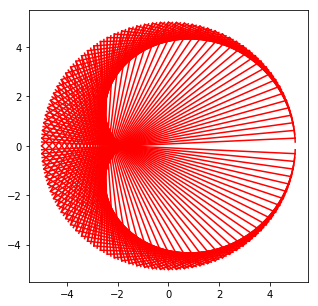

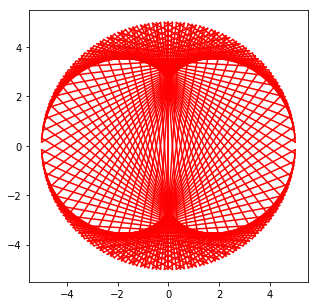

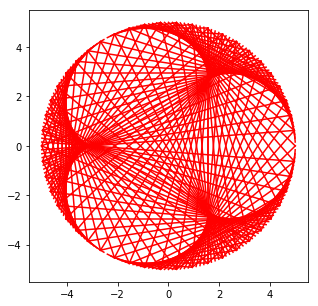

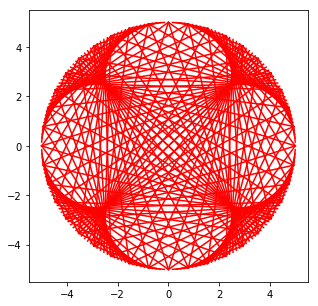

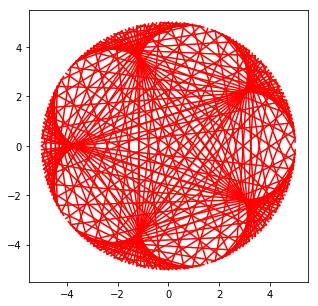

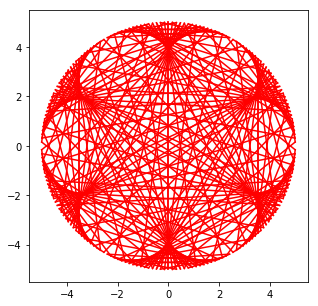

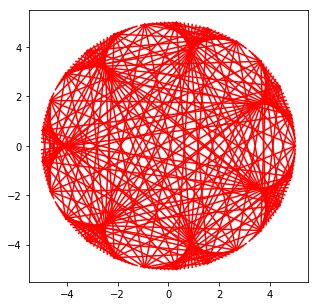

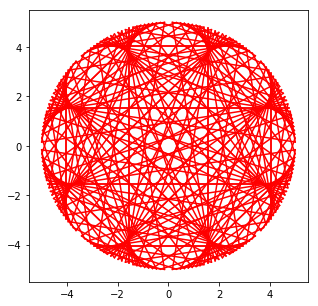

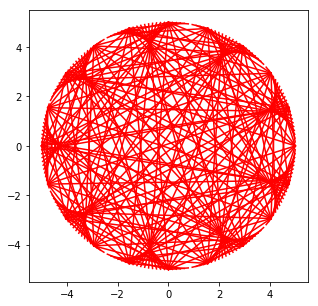

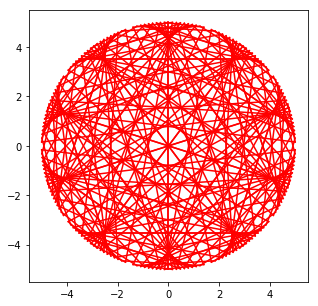

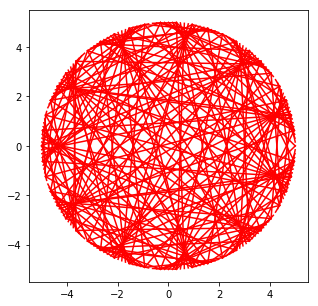

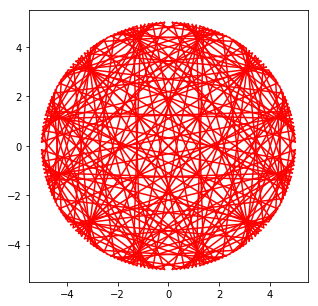

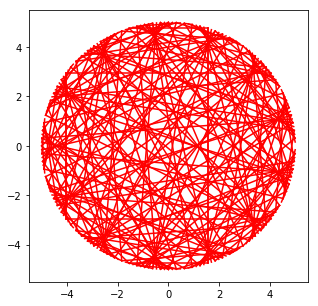

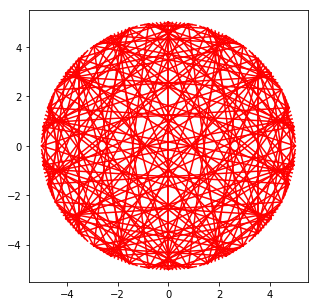

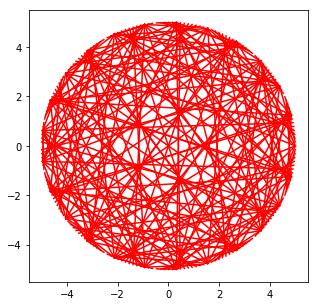

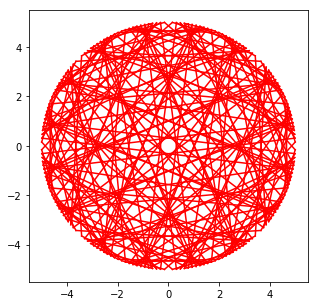

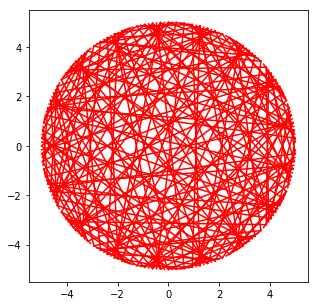

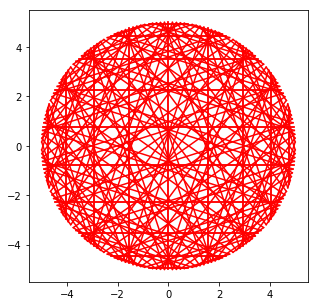

In [15]:
def ploting_image():
    
    script_dir = os.path.dirname('__file__')
    results_dir = os.path.join(script_dir, 'Results/')
    
    if not os.path.isdir(results_dir):
        os.makedirs(results_dir)
    
    plt.figure(figsize=[5,5])  
    plt.plot(x_np,y_np,x_ng,y_ng,linestyle='solid', color='red')

    plt.savefig(results_dir + 'foo'+str(f)+'.png')

   
fs = [i for i in range(200,220,1)]
for f in fs:
    #creates coordinates for line plots
    x,y = pattern_plot(n=100,r=5,fact=f)
    x_np = np.array(x)
    y_np = np.array(y) 
            

    if f%2 ==0:
        #Symmerty arrays
        x_ng = x_np*1
        y_ng = y_np*-1
        ploting_image()
    else:
        #Symmetry arrays
        x_ng = x_np*-1
        y_ng = y_np*-1
        ploting_image()     

In [16]:
img_array = []
for filename in glob.glob('C:\\Users\\dell\\Desktop\\ML\\Results\\*.png'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('project.mp4',cv2.VideoWriter_fourcc(*'DIVX'),2, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()